In [1]:
import os
from functools import partial
from typing import Any, Dict, Tuple, Literal

import torch
import deeplake
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.utils.data import DataLoader

In [22]:
def adjust_brightness(
    img: np.ndarray, 
    alpha: float | int
    ) -> np.ndarray:

    if alpha < -1 or alpha > 1:
        raise ValueError(f"Alpha of value {alpha} is out of range. Ensure value is between -1.0 and 1.0.")
    
    if alpha > 0:
        img = img + (abs(alpha) * (255 - img))
    
    if alpha < 0:
        img = img - (abs(alpha) * (img - 0))

    img = np.clip(img, 0, 255).astype(np.uint8)

    return img

def apply_perturbation(
    img: np.ndarray, 
    perturbation_type: Literal["brightness"], 
    alpha: float | int
    ):

    perturbations = {
        "brightness": adjust_brightness
    }

    if perturbation_type in perturbations:
        return perturbations[perturbation_type](img, alpha)
    
    return img

def perturbation_fn(
    row: Dict[str, Any], 
    perturbation_type: str, 
    alpha: float | int
    ) -> Tuple[torch.Tensor]:

    """
    Performs image-level preprocessing for encoding.
    """
    img_transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.ToTensor(),
        # transforms.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
    ])

    img = apply_perturbation(
        img=row["image"], 
        perturbation_type=perturbation_type, 
        alpha=alpha
    )
    img = img_transform(img)

    label = torch.tensor(row["label"], dtype=torch.long)
    file_key = torch.tensor(row["file_key"], dtype=torch.long)

    return img, label, file_key

In [23]:
data_dir = os.path.join("..", "data", "gleason-grading")
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "test")

In [95]:
perturbation_type = "brightness"
strength = 0.5

custom_transform_fn = partial(perturbation_fn, perturbation_type=perturbation_type, alpha=strength)

In [96]:
train_ds = deeplake.open_read_only(train_dir).pytorch(transform=custom_transform_fn)
val_ds = deeplake.open_read_only(val_dir).pytorch(transform=custom_transform_fn)

train_loader = DataLoader(train_ds, batch_size=1, shuffle=False)
val_loader = DataLoader(val_ds, batch_size=1, shuffle=False)

In [97]:
img, label, file_key = next(iter(train_loader))

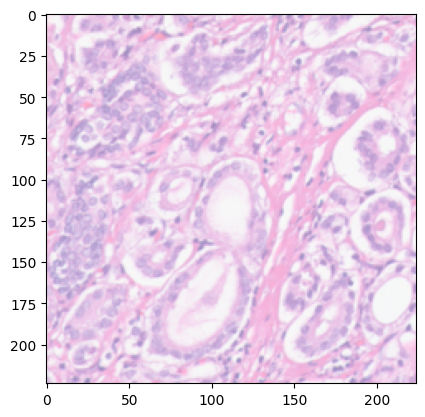

In [98]:
plt.imshow(img.squeeze().permute(1,2,0).numpy())
plt.show()

In [78]:
train_ds = deeplake.open_read_only(train_dir)
val_ds = deeplake.open_read_only(val_dir)

In [30]:
idx = 0

img = train_ds[idx]["image"]
label = train_ds[idx]["label"]
file_key = train_ds[idx]["file_key"]

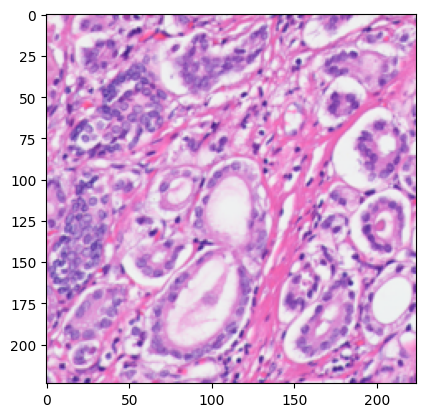

In [31]:
plt.imshow(img)
plt.show()

In [ ]:
def adjust_brightness(
    img: np.ndarray, 
    alpha: float
    ) -> np.ndarray:
    
    if alpha < 0:
        img = img - (abs(alpha) * (img - 0))

    if alpha > 0:
        img = img + (abs(alpha) * (255 - img))

    img = np.clip(img, 0, 255).astype(np.uint8)

    return img

0


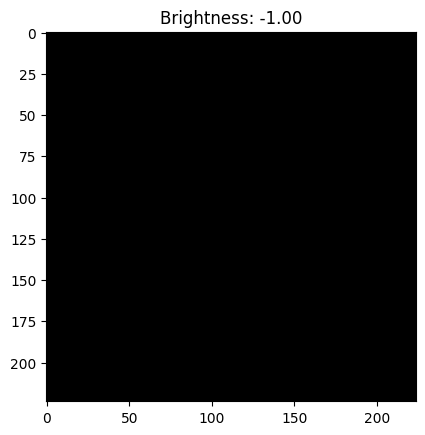

1


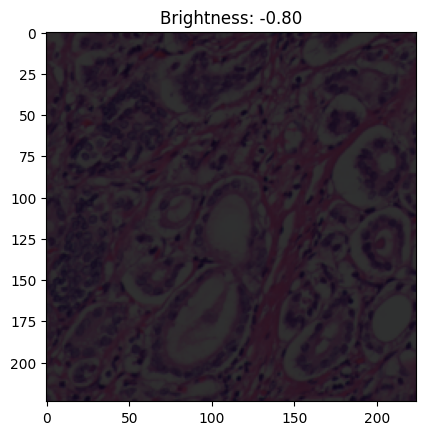

2


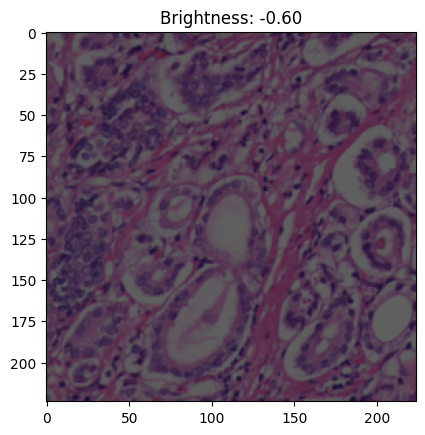

3


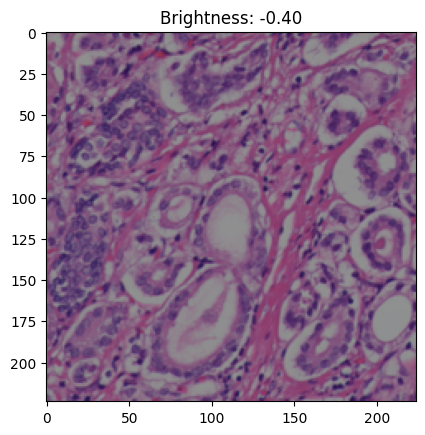

4


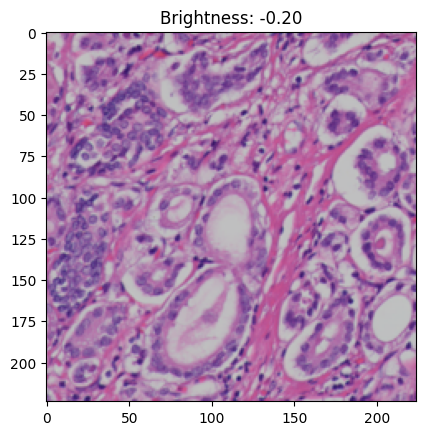

5


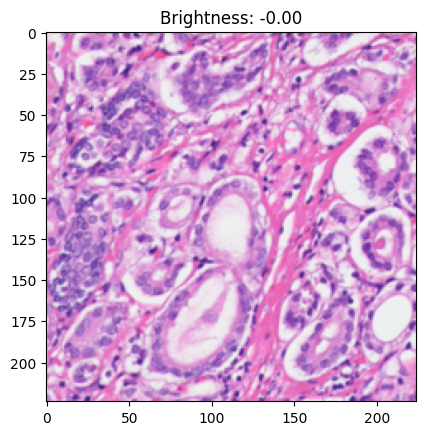

6


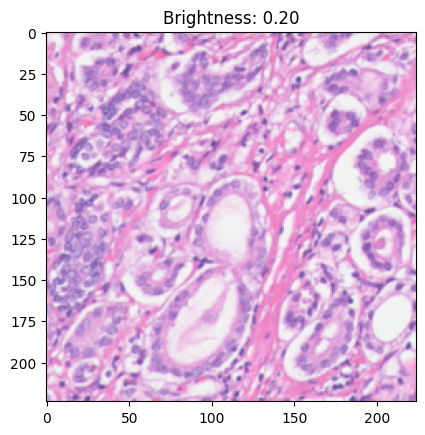

7


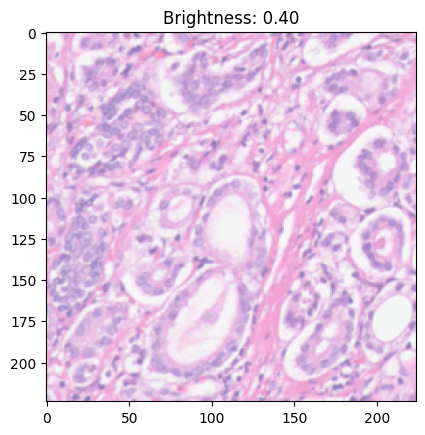

8


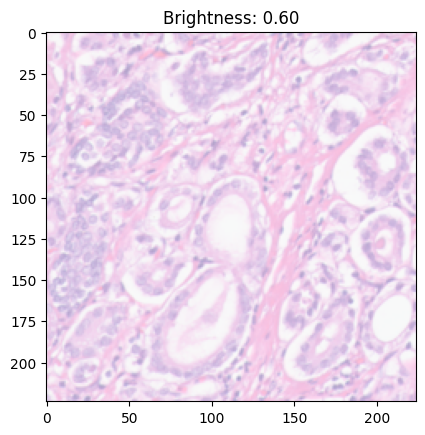

9


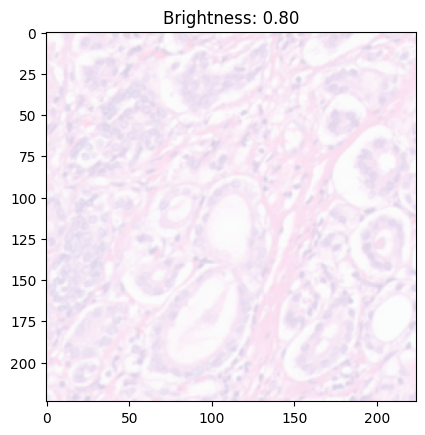

10


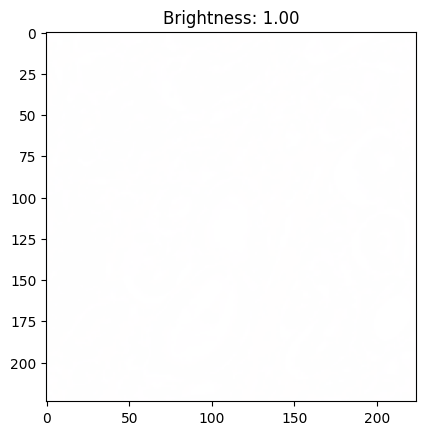

In [55]:
for i, alpha in enumerate(np.arange(-1, 1.2, 0.2)):
    print(i)
    augmented_img = adjust_brightness(img, alpha=alpha)

    plt.title(f"Brightness: {alpha:.2f}")
    plt.imshow(augmented_img)
    plt.show()